<a href="https://colab.research.google.com/github/nandu26m/data-analytics-projects/blob/main/airlines-data-analysis-project/airlines-data-analysis-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading and Investigating the data

### 1.1. Load the dataset and check the version

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
print(pd.__version__)

data = pd.read_csv("airlines_flights_data.csv")

2.2.2


### 1.2. View the first few rows

In [2]:
data.head() # Helps to quickly understand the structure and columns.

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


### 1.3. View the last few rows

In [3]:
data.tail() # Useful to see if there are issues at the end of the dataset.

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
13293,13293,Vistara,UK-977,Delhi,Evening,one,Early_Morning,Bangalore,Economy,12.83,18.0,4896.0
13294,13294,Air_India,AI-473,Delhi,Evening,one,Afternoon,Bangalore,Economy,19.67,18.0,4728.0
13295,13295,Air_India,AI-877,Delhi,Morning,one,Afternoon,Bangalore,Economy,27.33,18.0,4728.0
13296,13296,Indigo,6E-369,Delhi,Night,one,Early_Morning,Bangalore,Economy,10.00,18.0,4740.0
13297,13297,Indigo,6E-2769,Delhi,Morning,one,A,NaN,NaN,NaN,NaN,NaN


### 1.4. Check dataset shape

In [4]:
data.shape # Gives total rows and columns.

(13298, 12)

### 1.5. Inspect column names

In [5]:
data.columns # Check for typos, spaces, or inconsistent capitalization.

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

### 1.6. Check data types and non-null counts

In [6]:
data.info() # Identifies columns, their data types, and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             13298 non-null  int64  
 1   airline           13298 non-null  object 
 2   flight            13298 non-null  object 
 3   source_city       13298 non-null  object 
 4   departure_time    13298 non-null  object 
 5   stops             13298 non-null  object 
 6   arrival_time      13298 non-null  object 
 7   destination_city  13297 non-null  object 
 8   class             13297 non-null  object 
 9   duration          13297 non-null  float64
 10  days_left         13297 non-null  float64
 11  price             13297 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


### 1.7. Summary statistics for numeric columns

In [7]:
data.describe() # Gives mean, median, min, max, std, etc.

,index,duration,days_left,price
count,13298.000000,13297.000000,13297.000000,13297.000000
mean,6648.500000,9.784706,21.974130,6881.278860
std,3838.946275,7.015957,13.858852,4119.753554
min,0.000000,2.000000,1.000000,2281.000000
25%,3324.250000,4.170000,11.000000,3855.000000
50%,6648.500000,8.000000,18.000000,5954.000000
75%,9972.750000,13.420000,34.000000,9183.000000
max,13297.000000,36.920000,49.000000,31917.000000


### 1.8. Check for missing values

In [8]:
data.isna().sum() # Identify columns with missing data and counts.

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,1
class,1
duration,1


### 1.9. Check for duplicates

In [9]:
data.duplicated().sum() # Verify if any rows are repeated.
data[data.duplicated()]  # inspect duplicate rows.

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


### 1.10. Check unique values for categorical columns

In [10]:
for col in data.select_dtypes(include='object'):
    print(col, data[col].nunique())

airline 6
flight 331
source_city 1
departure_time 6
stops 3
arrival_time 7
destination_city 2
class 1


### 1.11. Inspect actual values for important columns

In [11]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

### 1.12. Check for constant columns

In [12]:
data.nunique()

,0
index,13298
airline,6
flight,331
source_city,1
departure_time,6
stops,3
arrival_time,7
destination_city,2
class,1
duration,288


### 1.13. Check outliers for numeric columns

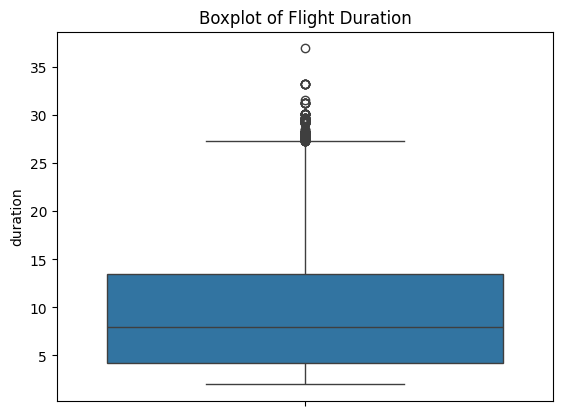

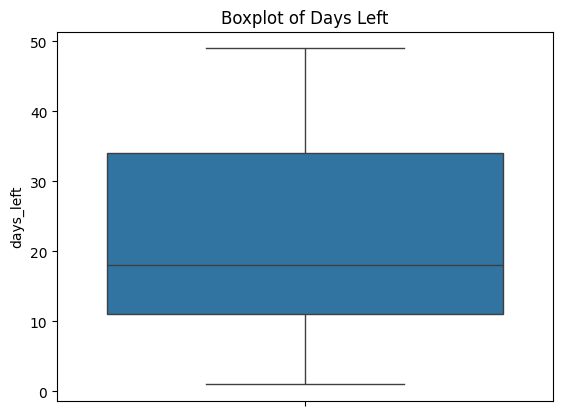

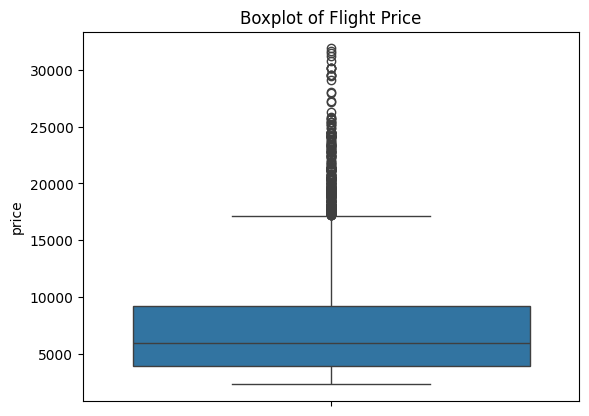

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Duration
sns.boxplot(data['duration'])
plt.title("Boxplot of Flight Duration")
plt.show()

# Days left
sns.boxplot(data['days_left'])
plt.title("Boxplot of Days Left")
plt.show()

# Price
sns.boxplot(data['price'])
plt.title("Boxplot of Flight Price")
plt.show()

### 1.14. Analyze distributions

In [14]:
categorical_columns = ['airline', 'source_city', 'destination_city', 'class', 'stops', 'departure_time', 'arrival_time']
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for airline:
airline
Vistara      3864
Air_India    3262
Indigo       2294
GO_FIRST     2077
AirAsia      1085
SpiceJet      716
Name: count, dtype: int64


Value counts for source_city:
source_city
Delhi    13298
Name: count, dtype: int64


Value counts for destination_city:
destination_city
Mumbai       9982
Bangalore    3315
Name: count, dtype: int64


Value counts for class:
class
Economy    13297
Name: count, dtype: int64


Value counts for stops:
stops
one            9889
zero           3135
two_or_more     274
Name: count, dtype: int64


Value counts for departure_time:
departure_time
Evening          3501
Morning          2901
Early_Morning    2785
Afternoon        2575
Night            1428
Late_Night        108
Name: count, dtype: int64


Value counts for arrival_time:
arrival_time
Night            4218
Evening          2829
Morning          2627
Afternoon        2260
Early_Morning     723
Late_Night        640
A                   1
Name: count, dtype: int64




### 1.15. Check correlations (numeric columns)

In [15]:
data.corr(numeric_only=True)

,index,duration,days_left,price
index,1.000000,0.023746,0.205661,-0.046318
duration,0.023746,1.000000,-0.069747,0.293218
days_left,0.205661,-0.069747,1.000000,-0.590122
price,-0.046318,0.293218,-0.590122,1.000000


# 2. Data Cleaning and Preprocessing

## 2.1. Handle Missing Values
* Decide whether to drop, fill, or impute missing values in relevant columns.



In [16]:
# Identify columns with missing data and counts
data.isna().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,1
class,1
duration,1


In [17]:
# There are no missing values, so this step can be skipped.

# Drop rows with missing values
data.dropna(inplace=True)

# Or fill missing values with numeric values with median
data["days_left"] = data["days_left"].fillna(data["days_left"].median())

## 2.2. Handle Duplicates

In [18]:
# Check for duplicate rows
data.duplicated().sum()

np.int64(0)

In [19]:
# In this dataset, there are no duplicates, so this step can also be skipped.
data.drop_duplicates(inplace=True)

## 2.3. Standardize Column Names
* Make column names consistent and clean for easier reference:

In [20]:
# Rename specific columns
data.rename(columns={'source_city':'Source_city', 'destination_city':'Destination_city'}, inplace=True)

In [21]:
data.columns

Index(['index', 'airline', 'flight', 'Source_city', 'departure_time', 'stops',
       'arrival_time', 'Destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [22]:
# Rename columns all at once
data.columns = [col.strip().capitalize() for col in data.columns]

In [23]:
data.columns

Index(['Index', 'Airline', 'Flight', 'Source_city', 'Departure_time', 'Stops',
       'Arrival_time', 'Destination_city', 'Class', 'Duration', 'Days_left',
       'Price'],
      dtype='object')

## 2.4. Clean Categorical Data
* Remove leading/trailing spaces and standardize text:

In [24]:
data['Flight'] = data['Flight'].str.strip().str.upper()
data['Class'] = data['Class'].str.strip().str.capitalize()

In [25]:
data.head()

,Index,Airline,Flight,Source_city,Departure_time,Stops,Arrival_time,Destination_city,Class,Duration,Days_left,Price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


## 2.5. Convert Data Types
* Convert columns to appropriate types for analysis:

In [26]:
# If departure/arrival times are strings, convert to datetime
# data['Departure_time'] = pd.to_datetime(data['Departure_time'])
# data['Arrival_time'] = pd.to_datetime(data['Arrival_time'])

# Numeric columns are already correct

## 2.8. Final Check

In [27]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 13297 entries, 0 to 13296
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             13297 non-null  int64  
 1   Airline           13297 non-null  object 
 2   Flight            13297 non-null  object 
 3   Source_city       13297 non-null  object 
 4   Departure_time    13297 non-null  object 
 5   Stops             13297 non-null  object 
 6   Arrival_time      13297 non-null  object 
 7   Destination_city  13297 non-null  object 
 8   Class             13297 non-null  object 
 9   Duration          13297 non-null  float64
 10  Days_left         13297 non-null  float64
 11  Price             13297 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.3+ MB


,Index,Duration,Days_left,Price
count,13297.0000,13297.000000,13297.000000,13297.000000
mean,6648.0000,9.784706,21.974130,6881.278860
std,3838.6576,7.015957,13.858852,4119.753554
min,0.0000,2.000000,1.000000,2281.000000
25%,3324.0000,4.170000,11.000000,3855.000000
50%,6648.0000,8.000000,18.000000,5954.000000
75%,9972.0000,13.420000,34.000000,9183.000000
max,13296.0000,36.920000,49.000000,31917.000000


# 3. Exploratory Data Analysis (EDA) — Define Questions and Hypotheses

## 3.1. Airline Analysis

Q1. Which airline operates the most flights?

In [33]:
# Q1. Which airline operates the most flights?

# Number of flights per airline
airline_counts = data["Airline"].value_counts()
print(f"Number of flights per airline:\n", airline_counts)

# Average flight price per airline
ave_price_airline = data.groupby("Airline")["Price"].mean().sort_values(ascending=False)
print(f"\nAverage flight price per airline:\n", ave_price_airline)

# Flights with non-stop
non_stop_counts = data[data["Stops"] == "zero"]["Airline"].value_counts()
print("\nNon-stop flights per airline:\n", non_stop_counts)

Number of flights per airline:
 Airline
Vistara      3864
Air_India    3262
Indigo       2293
GO_FIRST     2077
AirAsia      1085
SpiceJet      716
Name: count, dtype: int64

Average flight price per airline:
 Airline
Air_India    7677.337216
Vistara      7634.127329
GO_FIRST     6167.611940
AirAsia      5998.578802
Indigo       5873.559965
SpiceJet     5826.762570
Name: Price, dtype: float64

Non-stop flights per airline:
 Airline
Indigo       845
Vistara      839
GO_FIRST     576
Air_India    400
SpiceJet     312
AirAsia      163
Name: count, dtype: int64


4.2. Route Analysis (Source → Destination)

In [46]:
# Most popular source cities
top_source_cities = data["Source_city"].value_counts().head()
print("Most popular source cities:\n", top_source_cities)

# Most popular destination cities
top_destination_cities = data["Destination_city"].value_counts().head()
print("\nMost popular destination cities:\n", top_destination_cities)

# Most expensive routes (Source → Destination)
most_expensive_routes = (
    data.groupby(["Source_city", "Destination_city"])["Price"]
        .mean()
        .sort_values(ascending=False)
        .head(10)
)
print("\nMost expensive routes (Source → Destination):\n", most_expensive_routes)

# Routes with longest duration
longest_duration_routes = (
    data.groupby(["Source_city", "Destination_city"])["Duration"]
        .mean()
        .sort_values(ascending=False)
        .head(1)
)
print("\nRoutes with longest duration:\n", longest_duration_routes)

Most popular source cities:
 Source_city
Delhi    13297
Name: count, dtype: int64

Most popular destination cities:
 Destination_city
Mumbai       9982
Bangalore    3315
Name: count, dtype: int64

Most expensive routes (Source → Destination):
 Source_city  Destination_city
Delhi        Bangalore           9354.805732
             Mumbai              6059.826087
Name: Price, dtype: float64

Routes with longest duration:
 Source_city  Destination_city
Delhi        Bangalore           10.530588
Name: Duration, dtype: float64


4.3. Flight Timing Analysis

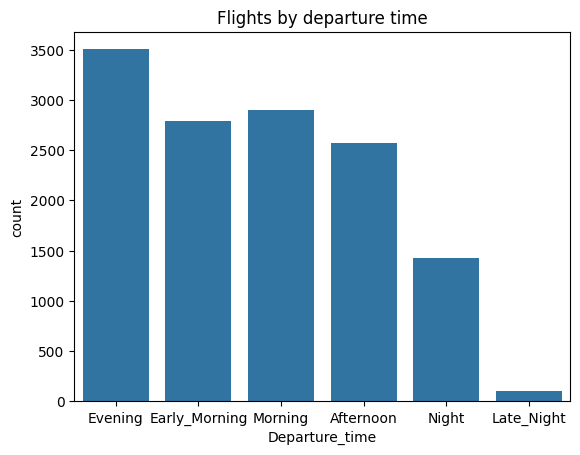

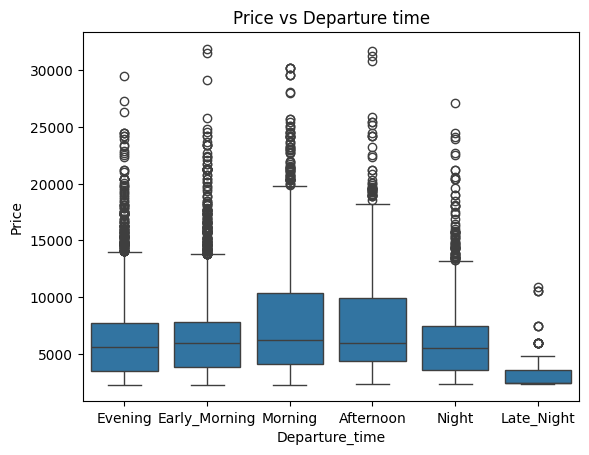

In [56]:
# Flights by departure time
sns.countplot(x="Departure_time", data=data)
plt.title("Flights by departure time")
plt.show()
print()

# Price vs departure time
sns.boxplot(x="Departure_time", y="Price", data=data)
plt.title("Price vs Departure time")
plt.show()

4.4. Stops Analysis

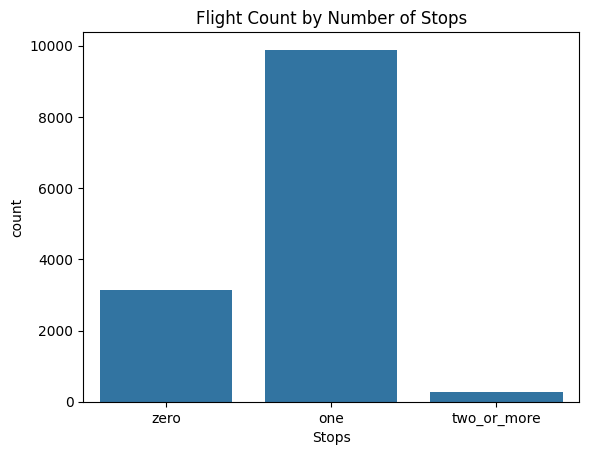


Average price by number of stops:
 Stops
one             7640.477549
two_or_more    10759.583942
zero            4147.750239
Name: Price, dtype: float64


In [57]:
# Count of flights by number of stops
sns.countplot(x='Stops', data=data)
plt.title("Flight Count by Number of Stops")
plt.show()

# Average price by number of stops
avg_price_stops = data.groupby('Stops')['Price'].mean()
print("\nAverage price by number of stops:\n", avg_price_stops)

4.5. Class Analysis

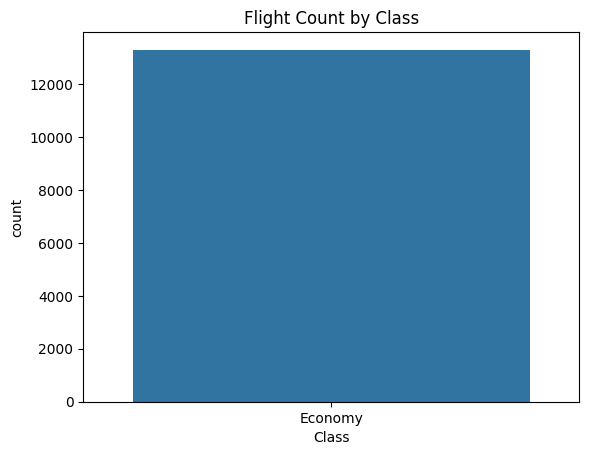


Average price by class:
 Class
Economy    6881.27886
Name: Price, dtype: float64


In [58]:
# Count of flights by class
sns.countplot(x='Class', data=data)
plt.title("Flight Count by Class")
plt.show()

# Average price by class
avg_price_class = data.groupby('Class')['Price'].mean()
print("\nAverage price by class:\n", avg_price_class)

4.7. Booking Timing Analysis (days_left)

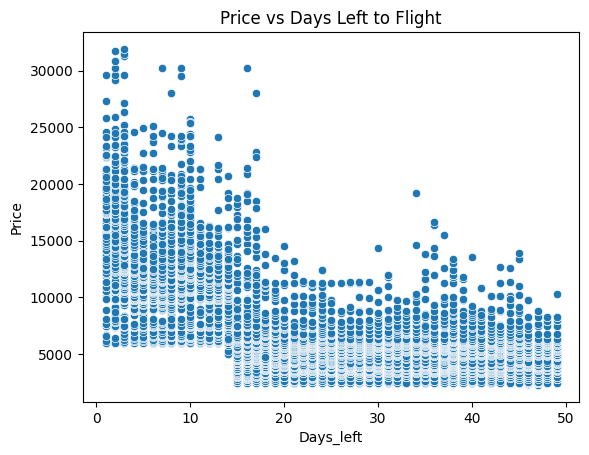


Average price by booking days bucket:
 Days_left_bucket
0-7        11231.272317
8-14        9941.251521
15-30       4851.699742
31-60       4506.542900
61-100              NaN
101-200             NaN
200+                NaN
Name: Price, dtype: float64


/tmp/ipython-input-1819651606.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_days = data.groupby('Days_left_bucket')['Price'].mean()


In [59]:
# Scatter plot of price vs days_left
sns.scatterplot(x='Days_left', y='Price', data=data)
plt.title("Price vs Days Left to Flight")
plt.show()

# Average price by days_left bucket (optional)
data['Days_left_bucket'] = pd.cut(data['Days_left'], bins=[0,7,14,30,60,100,200,500], labels=['0-7','8-14','15-30','31-60','61-100','101-200','200+'])
avg_price_days = data.groupby('Days_left_bucket')['Price'].mean()
print("\nAverage price by booking days bucket:\n", avg_price_days)

4.8. Combined Insights

In [62]:
# Cheapest airline for specific route or class:
cheapest_flights = data.groupby(['Source_city','Destination_city','Class'])['Price'].min().sort_values().head(10)
print("Top 10 cheapest flights:\n", cheapest_flights)

# Most popular combination of airline, route, and departure time:
popular_combo = data.groupby(['Airline','Source_city','Destination_city','Departure_time']).size().sort_values(ascending=False).head(10)
print("\nTop 10 popular airline-route combinations:\n", popular_combo)

Top 10 cheapest flights:
 Source_city  Destination_city  Class  
Delhi        Mumbai            Economy    2281.0
             Bangalore         Economy    3090.0
Name: Price, dtype: float64

Top 10 popular airline-route combinations:
 Airline    Source_city  Destination_city  Departure_time
Vistara    Delhi        Mumbai            Evening           886
                                          Afternoon         761
Air_India  Delhi        Mumbai            Evening           714
                                          Morning           643
                                          Early_Morning     585
Vistara    Delhi        Mumbai            Early_Morning     555
GO_FIRST   Delhi        Mumbai            Morning           466
Vistara    Delhi        Mumbai            Morning           438
GO_FIRST   Delhi        Mumbai            Early_Morning     402
Indigo     Delhi        Mumbai            Morning           378
dtype: int64


# 4. Visualization / Reporting

/tmp/ipython-input-3605728063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Airline', data=data, order=data['Airline'].value_counts().index, palette='viridis')


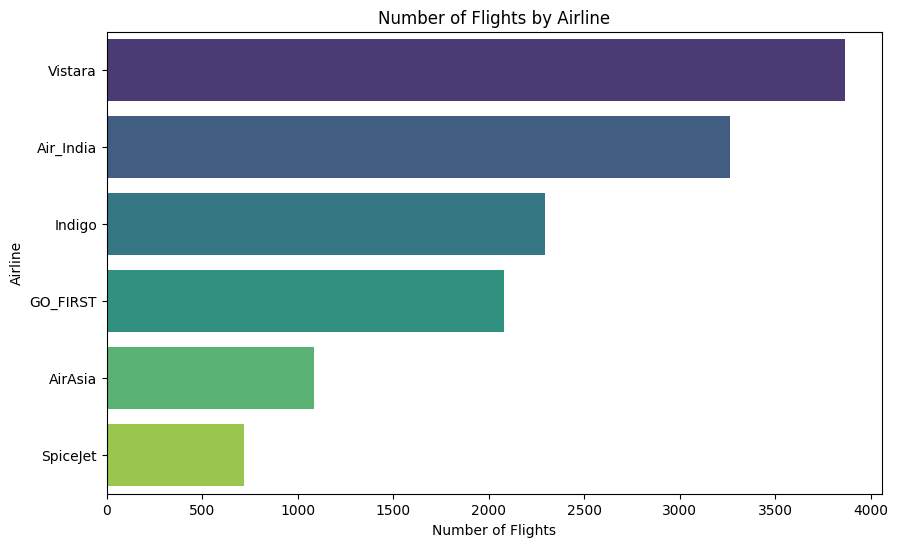

In [63]:
# 5.1. Airline-wise Flight Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(y='Airline', data=data, order=data['Airline'].value_counts().index, palette='viridis')
plt.title("Number of Flights by Airline")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()

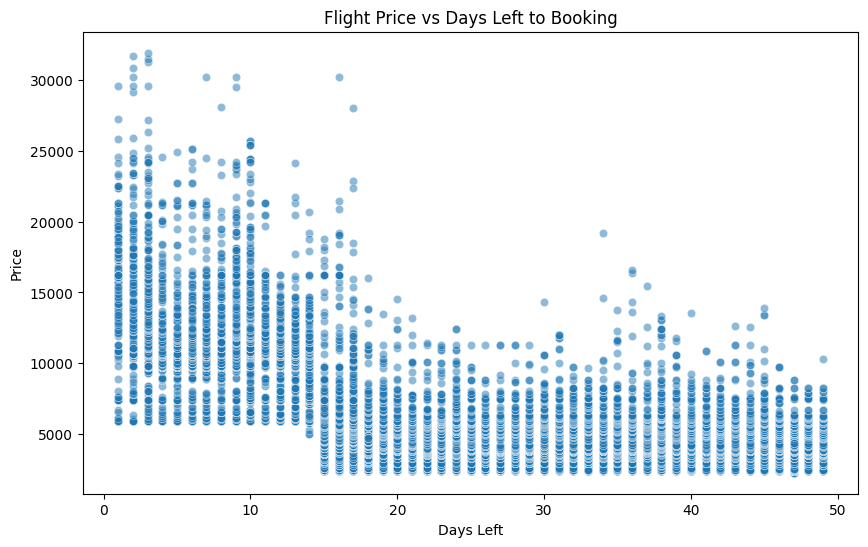

In [64]:
# 5.2. Price Trends vs Booking Days (Days_left)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Days_left', y='Price', data=data, alpha=0.5)
plt.title("Flight Price vs Days Left to Booking")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.show()

/tmp/ipython-input-2172183761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='pastel')


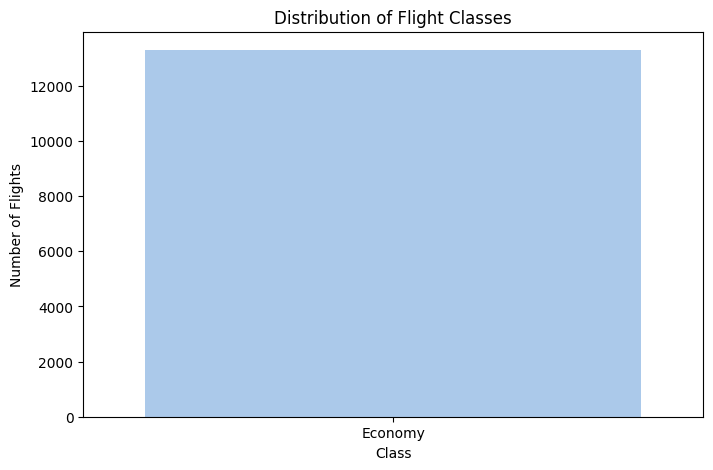

In [66]:
# 5.3. Flight Class Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Class', data=data, palette='pastel')
plt.title("Distribution of Flight Classes")
plt.xlabel("Class")
plt.ylabel("Number of Flights")
plt.show()

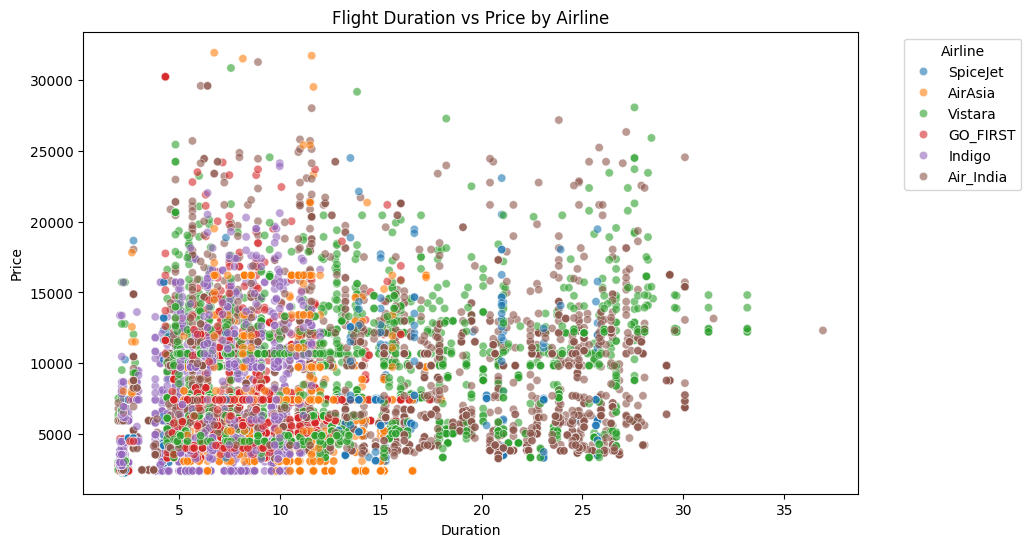

In [67]:
# 5.4. Flight Duration vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration', y='Price', data=data, hue='Airline', alpha=0.6, palette='tab10')
plt.title("Flight Duration vs Price by Airline")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.legend(title='Airline', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

/tmp/ipython-input-3558159594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stops', y='Price', data=data, palette='Set2')


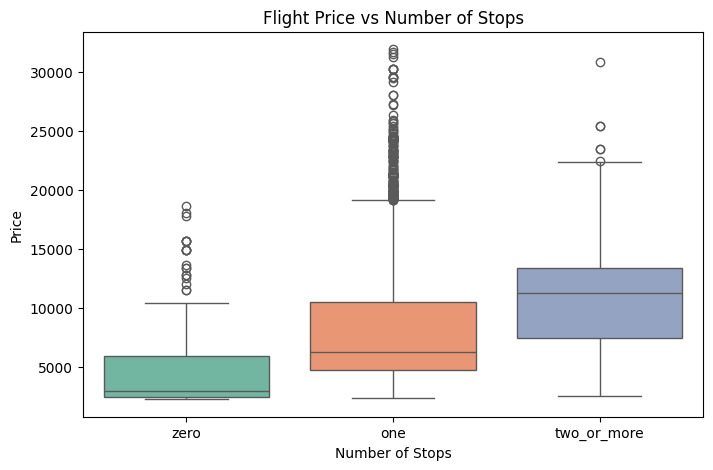

In [68]:
# 5.5. Stops vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Stops', y='Price', data=data, palette='Set2')
plt.title("Flight Price vs Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Price")
plt.show()

/tmp/ipython-input-4133710169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Airline', data=data, order=data['Airline'].value_counts().index, ax=axs[0,0], palette='viridis')
/tmp/ipython-input-4133710169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, ax=axs[0,1], palette='pastel')
/tmp/ipython-input-4133710169.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=top_routes.index, data=top_routes, ax=axs[1,1], palette='coolwarm')


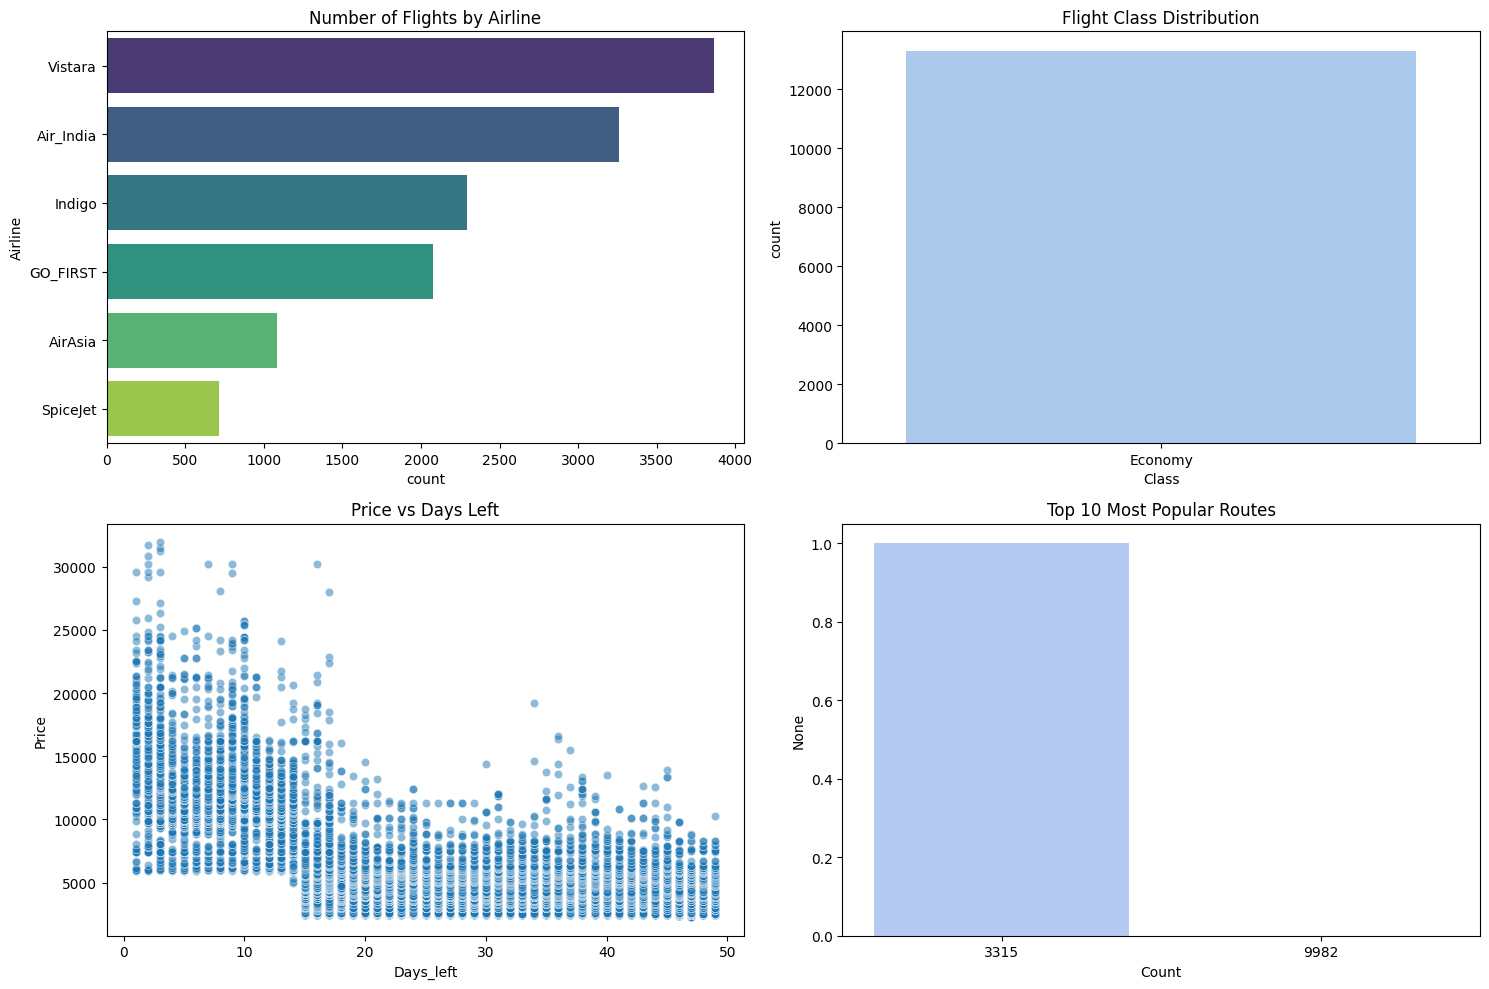

In [69]:
# 5.6. Summary Dashboard
fig, axs = plt.subplots(2,2, figsize=(15,10))

sns.countplot(y='Airline', data=data, order=data['Airline'].value_counts().index, ax=axs[0,0], palette='viridis')
axs[0,0].set_title("Number of Flights by Airline")

sns.countplot(x='Class', data=data, ax=axs[0,1], palette='pastel')
axs[0,1].set_title("Flight Class Distribution")

sns.scatterplot(x='Days_left', y='Price', data=data, alpha=0.5, ax=axs[1,0])
axs[1,0].set_title("Price vs Days Left")

top_routes = data.groupby(['Source_city','Destination_city']).size().sort_values(ascending=False).head(10).reset_index(name='Count')
sns.barplot(x='Count', y=top_routes.index, data=top_routes, ax=axs[1,1], palette='coolwarm')
axs[1,1].set_title("Top 10 Most Popular Routes")

plt.tight_layout()
plt.show()